# DS 6021 Final Project: An Analysis of Obesity Levels from Nutrition and Physical Characteristics

Erin Siedlecki, Natalie Seah, Emily Garman, Bela Barton, & Ben Doniger

## Introduction & Dataset Summary

In [566]:
# Add research Qs

## Data Engineering & Preparation

In [567]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
import statsmodels.api as sm
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import mean_squared_error, r2_score
from statsmodels.stats.outliers_influence import variance_inflation_factor
import matplotlib.pyplot as plt
from scipy import stats
from sklearn.compose import ColumnTransformer
from sklearn.linear_model import LassoCV
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

#### The Data Cleaning / Data Engineering (raw) Code

#### The Data Cleaning / Data Engineering Process

The dataset was loaded with pandas and initially checked using .info(). All columns were complete with no missing values, which made the cleaning process more straightforward. Before making any transformations, the official [dataset article](https://www.sciencedirect.com/science/article/pii/S2352340919306985?via%3Dihub) was consulted to understand what each variable represented according to the codebook.

The first step was renaming several columns to make them more readable. Many of the original names were short codes (like FAVC, FCVC, or NCP), so they were converted into descriptive labels that matched the codebook definitions. This made the dataset much easier and more intuitive to work with later.

Next, all binary categorical variables were standardized by mapping "yes"/"no" to "Yes"/"No" for consistency. This applied to features such as family history of overweight, high-calorie food consumption, smoking habits, and daily calorie monitoring.

Some features, like vegetable consumption frequency, number of daily meals, water intake, workout frequency, and time spent using technology, contained decimal values, even though the codebook defined them as categorical scales. Because the decimals didn’t carry meaningful information and the underlying scales were discrete, these variables were rounded to the nearest integer. This made sure the values aligned as accurately as possible with the categories defined in the codebook. 

After rounding, each integer was mapped to its proper label (for example, turning a 1 into “Never” for vegetable consumption or “Less than a liter” for water intake). Additional inconsistencies in text values were also corrected, such as fixing "Public_Transportation" and expanding the obesity-level categories into more readable forms (like "Obesity_Type_I" → "Obesity Type I").

Finally, all categorical features were converted to the category dtype so they are stored efficiently and treated properly during modeling. The cleaned dataset was exported as obesity_cleaned.csv, which is the version used for the rest of the project.

In [569]:
df = pd.read_csv('/Users/erinsiedlecki/UVA MSDS/MLFinalProject/obesity_cleaned.csv')

In [570]:
df['BMI (kg/m2)'] = round(df['Weight'] / (df['Height'] ** 2),2)

In [571]:
df.head(5)

,Gender,Age,Height,Weight,Overweight_Family_History,High_Calorie_Consumption_Often,Vegetable_Consumption_Often,Num_Main_Meals_Daily,Eat_Between_Meals,Smoke_Regularly,Water_Drank_Daily,Calories_Monitored_Daily,Workout_Frequency,Time_Using_Technology_Daily,Alcohol_Consumption_Frequency,Means_of_Transportation,Obesity_Level,BMI (kg/m2)
0,Female,21.0,1.62,64.0,Yes,No,Sometimes,3,Sometimes,No,Between 1 and 2 liters,No,I do not exercise,3-5 hours,Never,Public Transportation,Normal Weight,24.39
1,Female,21.0,1.52,56.0,Yes,No,Always,3,Sometimes,Yes,More than 2 liters,Yes,4 to 5 days a week,0-2 hours,Sometimes,Public Transportation,Normal Weight,24.24
2,Male,23.0,1.80,77.0,Yes,No,Sometimes,3,Sometimes,No,Between 1 and 2 liters,No,3 to 4 days a week,3-5 hours,Frequently,Public Transportation,Normal Weight,23.77
3,Male,27.0,1.80,87.0,No,No,Always,3,Sometimes,No,Between 1 and 2 liters,No,3 to 4 days a week,0-2 hours,Frequently,Walking,Overweight Level I,26.85
4,Male,22.0,1.78,89.8,No,No,Sometimes,1,Sometimes,No,Between 1 and 2 liters,No,I do not exercise,0-2 hours,Sometimes,Public Transportation,Overweight Level II,28.34


In [572]:
df = df.rename(columns={'Height': 'Height (m)', 'Weight': 'Weight (kg)'})
df.head(5)

,Gender,Age,Height (m),Weight (kg),Overweight_Family_History,High_Calorie_Consumption_Often,Vegetable_Consumption_Often,Num_Main_Meals_Daily,Eat_Between_Meals,Smoke_Regularly,Water_Drank_Daily,Calories_Monitored_Daily,Workout_Frequency,Time_Using_Technology_Daily,Alcohol_Consumption_Frequency,Means_of_Transportation,Obesity_Level,BMI (kg/m2)
0,Female,21.0,1.62,64.0,Yes,No,Sometimes,3,Sometimes,No,Between 1 and 2 liters,No,I do not exercise,3-5 hours,Never,Public Transportation,Normal Weight,24.39
1,Female,21.0,1.52,56.0,Yes,No,Always,3,Sometimes,Yes,More than 2 liters,Yes,4 to 5 days a week,0-2 hours,Sometimes,Public Transportation,Normal Weight,24.24
2,Male,23.0,1.80,77.0,Yes,No,Sometimes,3,Sometimes,No,Between 1 and 2 liters,No,3 to 4 days a week,3-5 hours,Frequently,Public Transportation,Normal Weight,23.77
3,Male,27.0,1.80,87.0,No,No,Always,3,Sometimes,No,Between 1 and 2 liters,No,3 to 4 days a week,0-2 hours,Frequently,Walking,Overweight Level I,26.85
4,Male,22.0,1.78,89.8,No,No,Sometimes,1,Sometimes,No,Between 1 and 2 liters,No,I do not exercise,0-2 hours,Sometimes,Public Transportation,Overweight Level II,28.34


## Visualization & Exploratory Data Analysis

In [573]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2111 entries, 0 to 2110
Data columns (total 18 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Gender                          2111 non-null   object 
 1   Age                             2111 non-null   float64
 2   Height (m)                      2111 non-null   float64
 3   Weight (kg)                     2111 non-null   float64
 4   Overweight_Family_History       2111 non-null   object 
 5   High_Calorie_Consumption_Often  2111 non-null   object 
 6   Vegetable_Consumption_Often     2111 non-null   object 
 7   Num_Main_Meals_Daily            2111 non-null   int64  
 8   Eat_Between_Meals               2111 non-null   object 
 9   Smoke_Regularly                 2111 non-null   object 
 10  Water_Drank_Daily               2111 non-null   object 
 11  Calories_Monitored_Daily        2111 non-null   object 
 12  Workout_Frequency               21

In [574]:
numeric = df[['Age', 'Height (m)', 'Weight (kg)', 'Num_Main_Meals_Daily', 'BMI (kg/m2)']]
num_corr = numeric.corr()
num_corr

,Age,Height (m),Weight (kg),Num_Main_Meals_Daily,BMI (kg/m2)
Age,1.000000,-0.025958,0.202560,-0.043367,0.244149
Height (m),-0.025958,1.000000,0.463136,0.244055,0.131788
Weight (kg),0.202560,0.463136,1.000000,0.103273,0.934807
Num_Main_Meals_Daily,-0.043367,0.244055,0.103273,1.000000,0.033819
BMI (kg/m2),0.244149,0.131788,0.934807,0.033819,1.000000


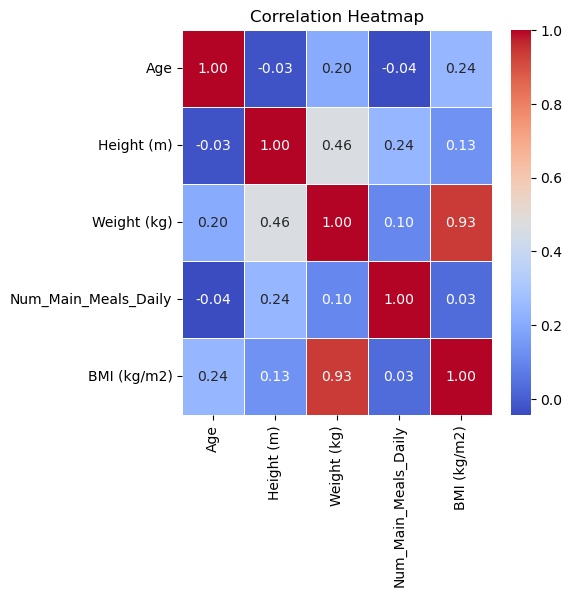

In [575]:
plt.figure(figsize=(5, 5))
sns.heatmap(num_corr, annot=True, cmap='coolwarm', fmt='.2f', linewidths=.5)
plt.title('Correlation Heatmap')
plt.show()

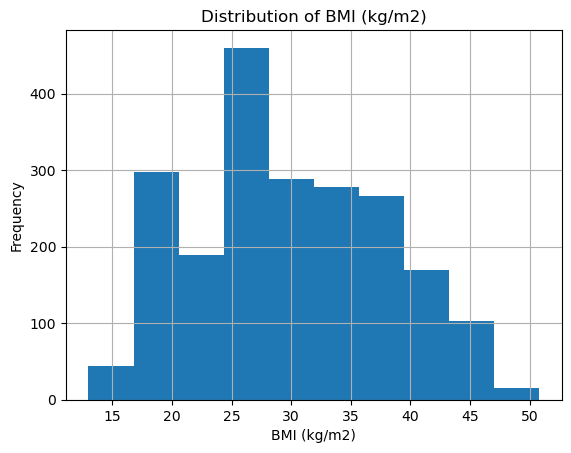

In [576]:
df['BMI (kg/m2)'].hist()
plt.title('Distribution of BMI (kg/m2)')
plt.xlabel('BMI (kg/m2)')
plt.ylabel('Frequency')
plt.show()

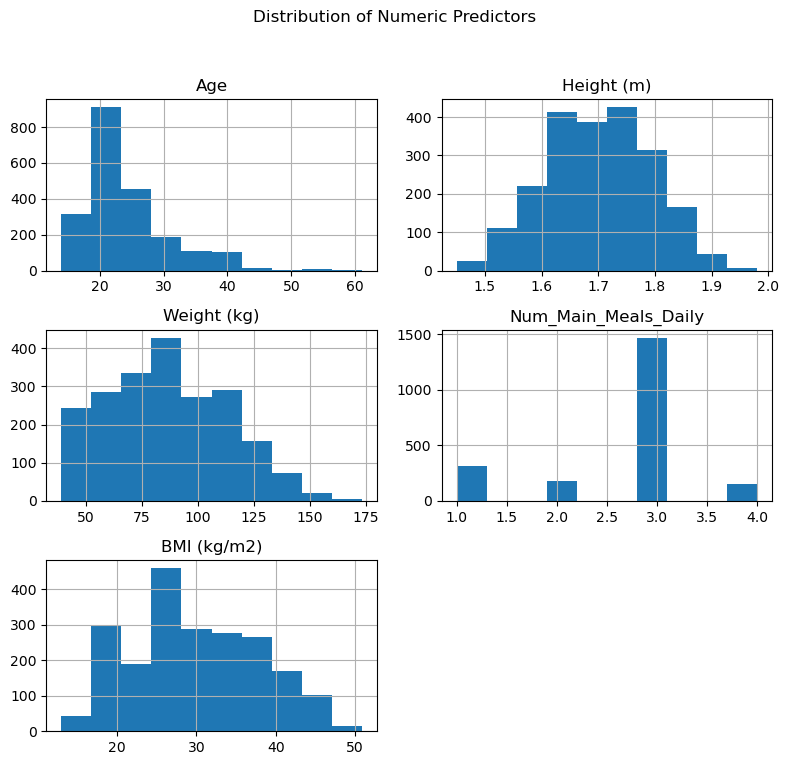

In [577]:
numeric.hist(figsize=(8,8))
plt.suptitle('Distribution of Numeric Predictors')
plt.tight_layout(rect=[0,0.03,1,0.95])
plt.show()

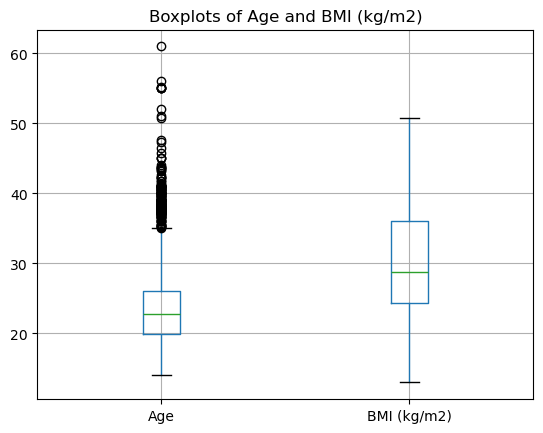

In [578]:
df[['Age', 'BMI (kg/m2)']].boxplot()
plt.title('Boxplots of Age and BMI (kg/m2)')
plt.show()

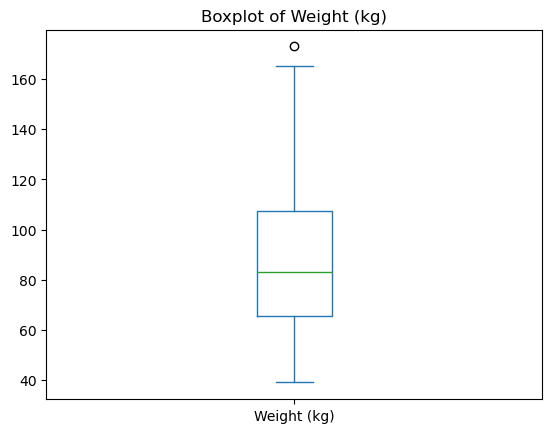

In [579]:
df['Weight (kg)'].plot.box()
plt.title('Boxplot of Weight (kg)')
plt.show()

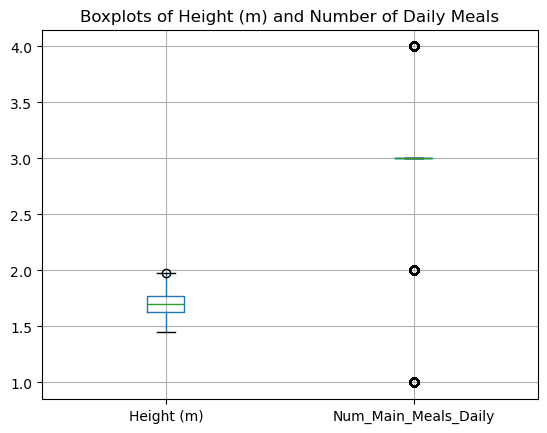

In [580]:
df[['Height (m)', 'Num_Main_Meals_Daily']].boxplot()
plt.title('Boxplots of Height (m) and Number of Daily Meals')
plt.show()

In [581]:
df.describe()

,Age,Height (m),Weight (kg),Num_Main_Meals_Daily,BMI (kg/m2)
count,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000
mean,24.312600,1.701677,86.586058,2.687826,29.700137
std,6.345968,0.093305,26.191172,0.809680,8.011354
min,14.000000,1.450000,39.000000,1.000000,13.000000
25%,19.947192,1.630000,65.473343,3.000000,24.325000
50%,22.777890,1.700499,83.000000,3.000000,28.720000
75%,26.000000,1.768464,107.430682,3.000000,36.015000
max,61.000000,1.980000,173.000000,4.000000,50.810000


In [582]:
df.describe(include='all')

,Gender,Age,Height (m),Weight (kg),Overweight_Family_History,High_Calorie_Consumption_Often,Vegetable_Consumption_Often,Num_Main_Meals_Daily,Eat_Between_Meals,Smoke_Regularly,Water_Drank_Daily,Calories_Monitored_Daily,Workout_Frequency,Time_Using_Technology_Daily,Alcohol_Consumption_Frequency,Means_of_Transportation,Obesity_Level,BMI (kg/m2)
count,2111,2111.000000,2111.000000,2111.000000,2111,2111,2111,2111.000000,2111,2111,2111,2111,2111,2111,2111,2111,2111,2111.000000
unique,2,NaN,NaN,NaN,2,2,3,NaN,4,2,3,2,4,3,4,5,7,NaN
top,Male,NaN,NaN,NaN,Yes,Yes,Sometimes,NaN,Sometimes,No,Between 1 and 2 liters,No,1 or 2 days a week,0-2 hours,Sometimes,Public Transportation,Obesity Type I,NaN
freq,1068,NaN,NaN,NaN,1726,1866,1013,NaN,1765,2067,1110,2015,776,952,1401,1580,351,NaN
mean,NaN,24.312600,1.701677,86.586058,NaN,NaN,NaN,2.687826,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,29.700137
std,NaN,6.345968,0.093305,26.191172,NaN,NaN,NaN,0.809680,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.011354
min,NaN,14.000000,1.450000,39.000000,NaN,NaN,NaN,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,13.000000
25%,NaN,19.947192,1.630000,65.473343,NaN,NaN,NaN,3.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,24.325000
50%,NaN,22.777890,1.700499,83.000000,NaN,NaN,NaN,3.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,28.720000
75%,NaN,26.000000,1.768464,107.430682,NaN,NaN,NaN,3.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,36.015000


In [583]:
categorical = df.select_dtypes(include='object').columns

for col in categorical:
    print(df[col].value_counts())
    print('-' * 30)

Gender
Male      1068
Female    1043
Name: count, dtype: int64
------------------------------
Overweight_Family_History
Yes    1726
No      385
Name: count, dtype: int64
------------------------------
High_Calorie_Consumption_Often
Yes    1866
No      245
Name: count, dtype: int64
------------------------------
Vegetable_Consumption_Often
Sometimes    1013
Always        996
Never         102
Name: count, dtype: int64
------------------------------
Eat_Between_Meals
Sometimes     1765
Frequently     242
Always          53
Never           51
Name: count, dtype: int64
------------------------------
Smoke_Regularly
No     2067
Yes      44
Name: count, dtype: int64
------------------------------
Water_Drank_Daily
Between 1 and 2 liters    1110
More than 2 liters         516
Less than a liter          485
Name: count, dtype: int64
------------------------------
Calories_Monitored_Daily
No     2015
Yes      96
Name: count, dtype: int64
------------------------------
Workout_Frequency
1 or 2 d

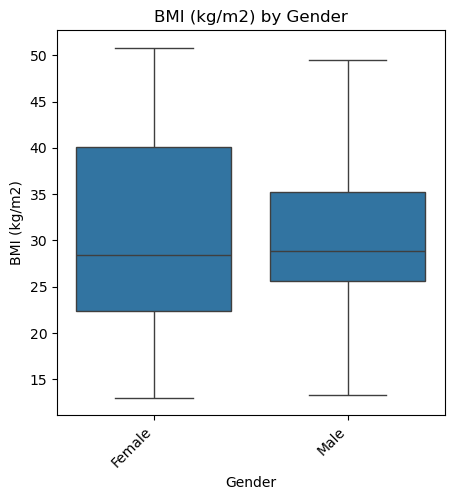

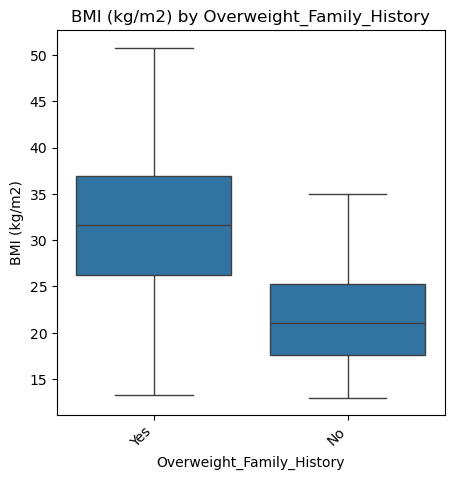

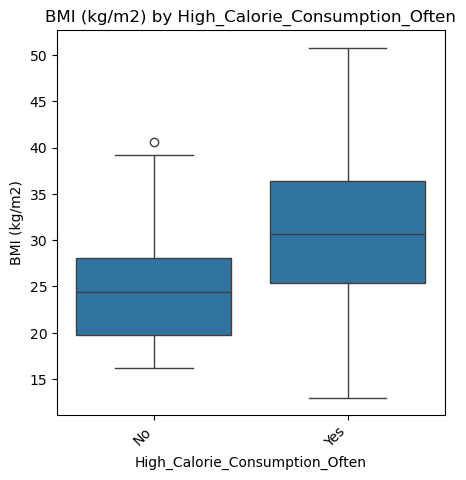

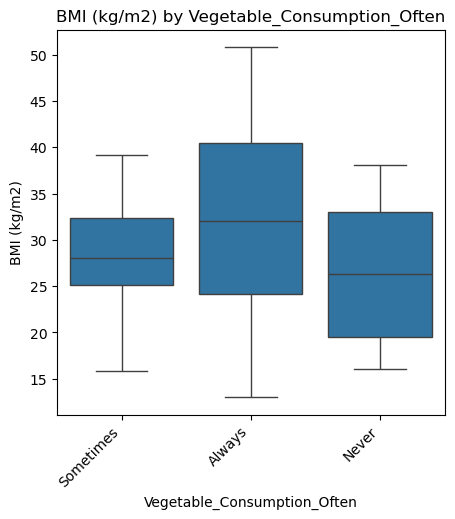

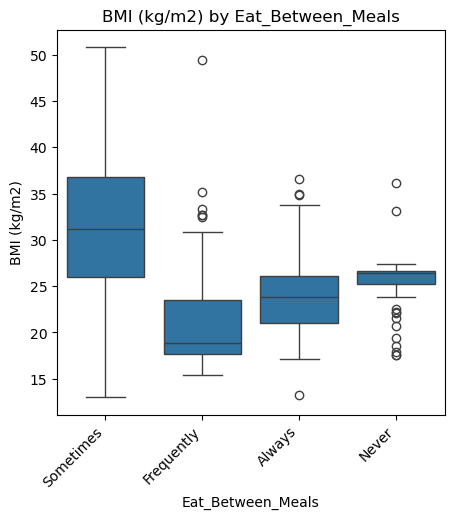

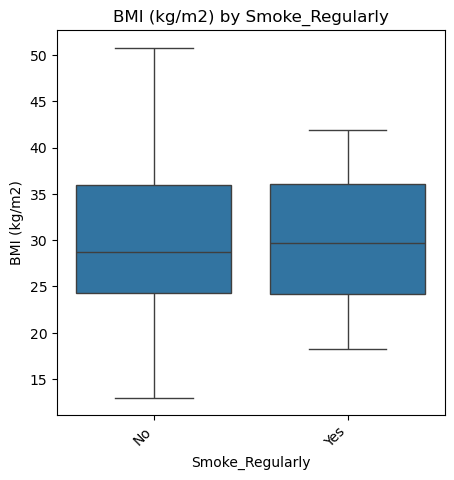

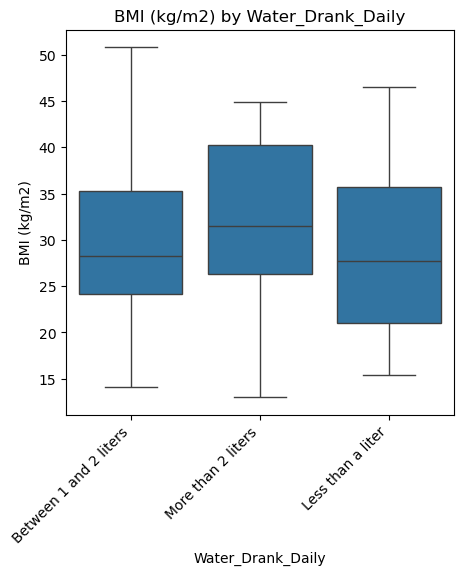

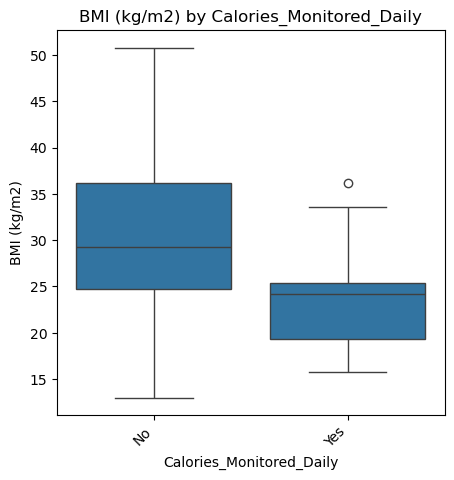

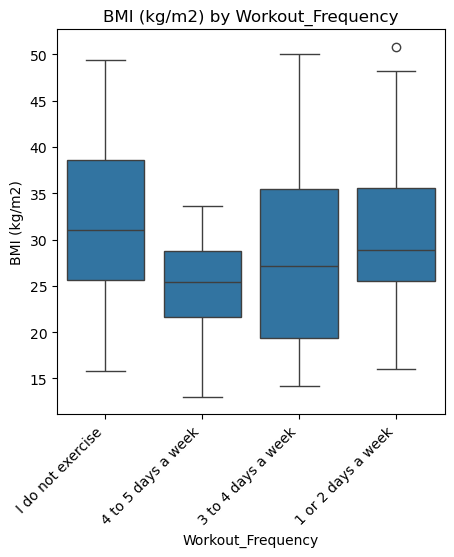

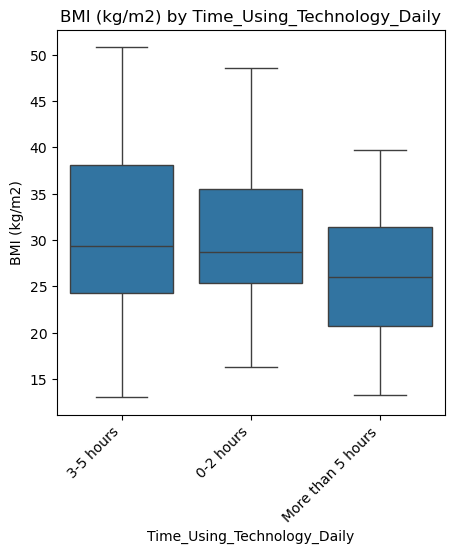

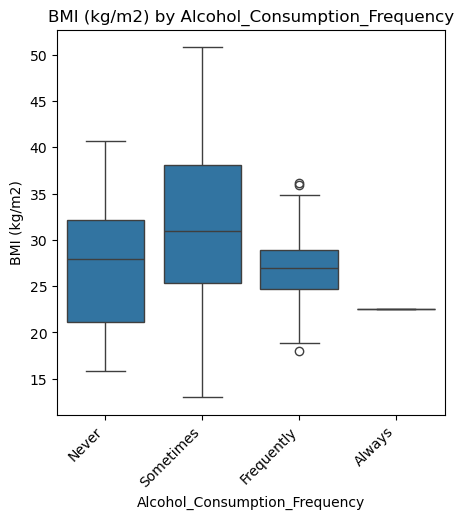

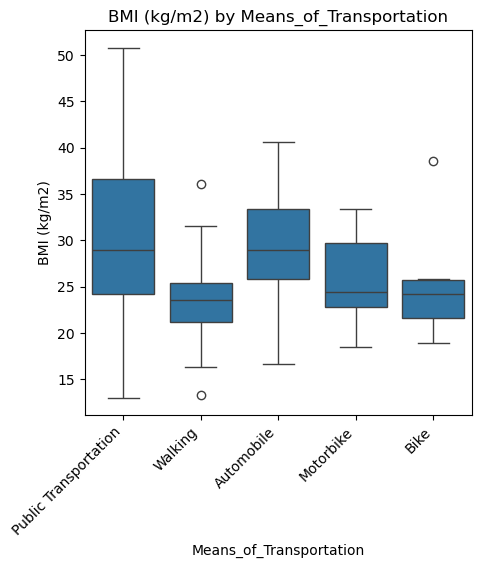

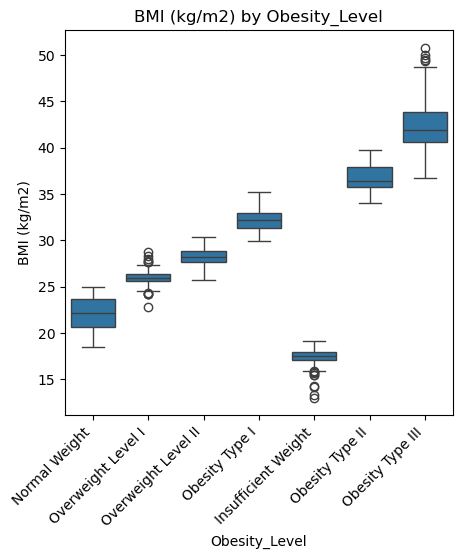

In [584]:
for col in categorical:
    plt.figure(figsize=(5,5))
    sns.boxplot(x=col, y='BMI (kg/m2)', data=df)
    plt.title(f'BMI (kg/m2) by {col}')
    plt.xticks(rotation=45, ha='right')
    plt.show()

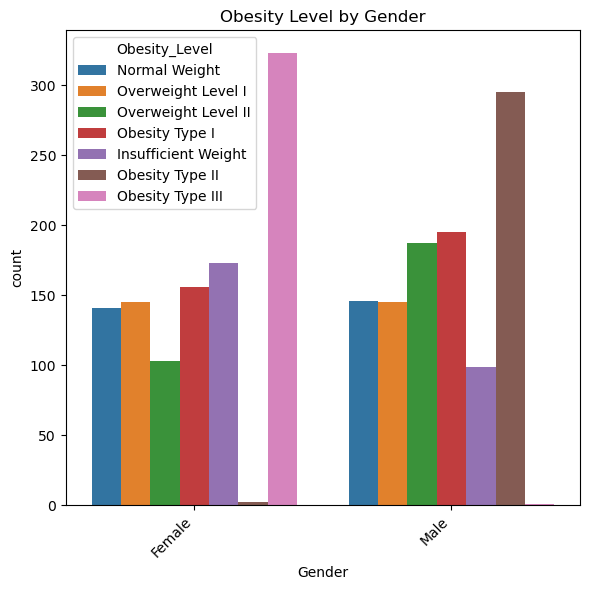

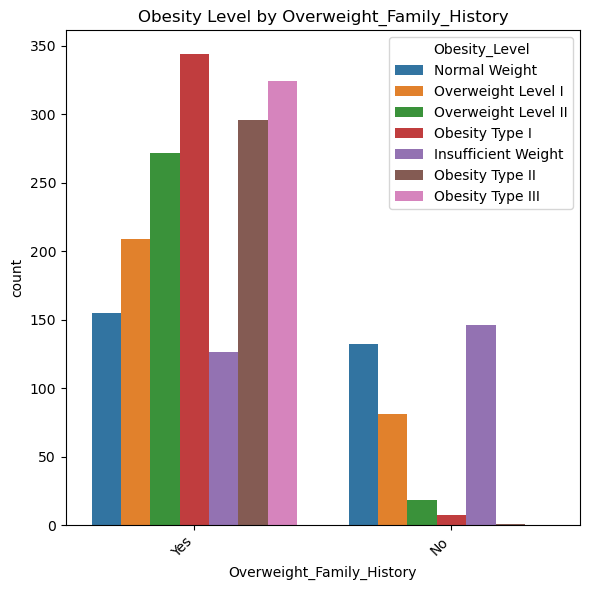

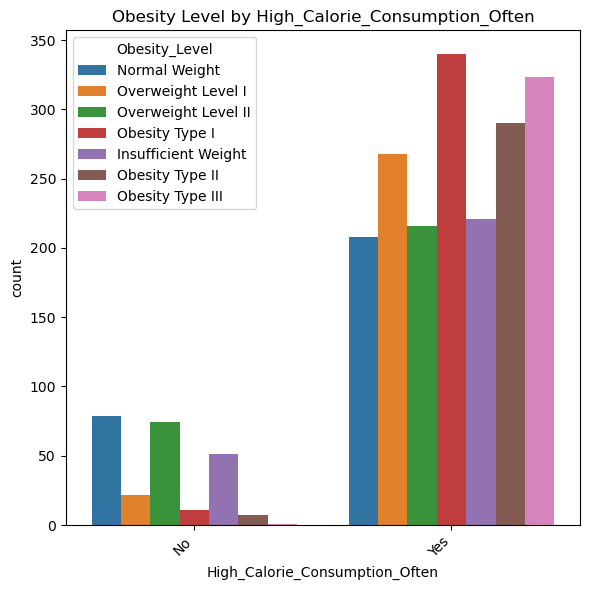

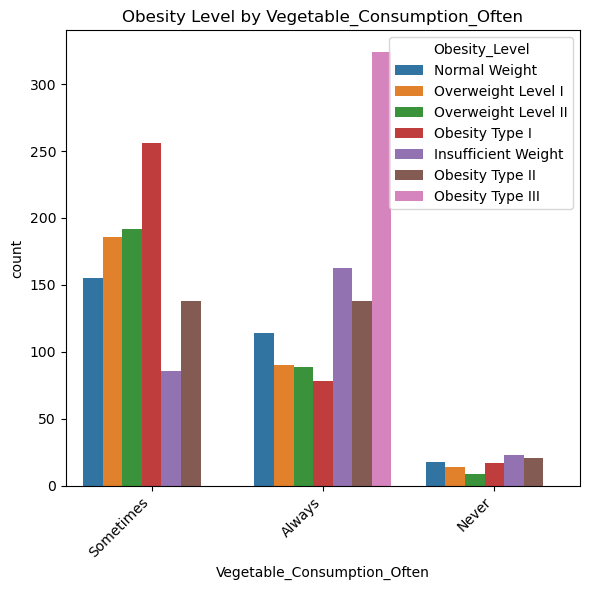

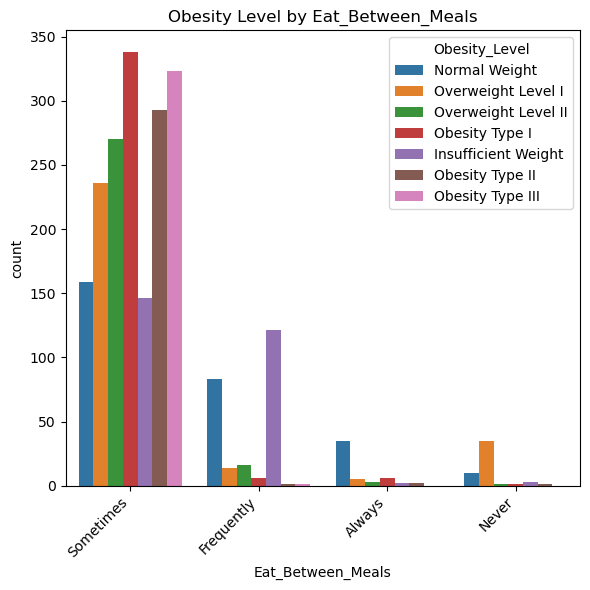

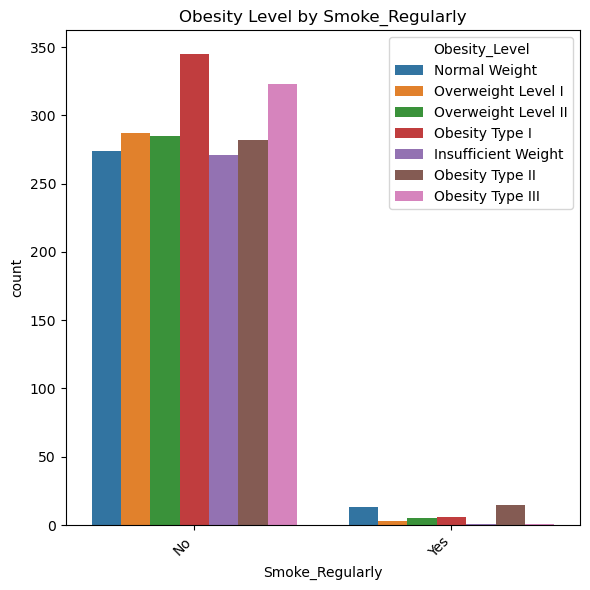

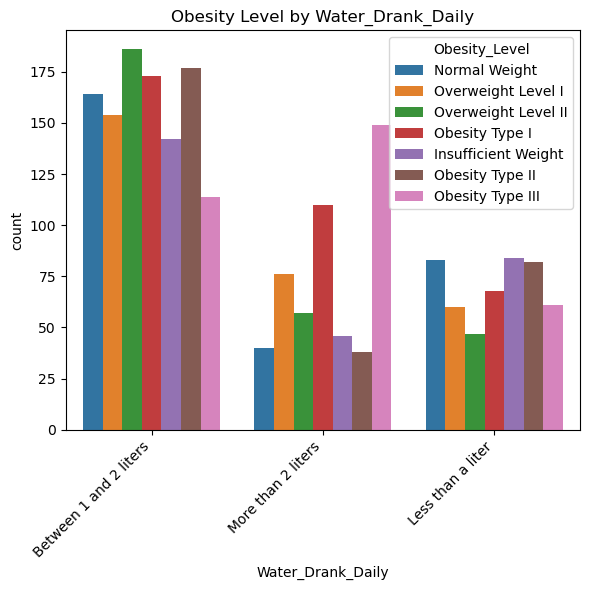

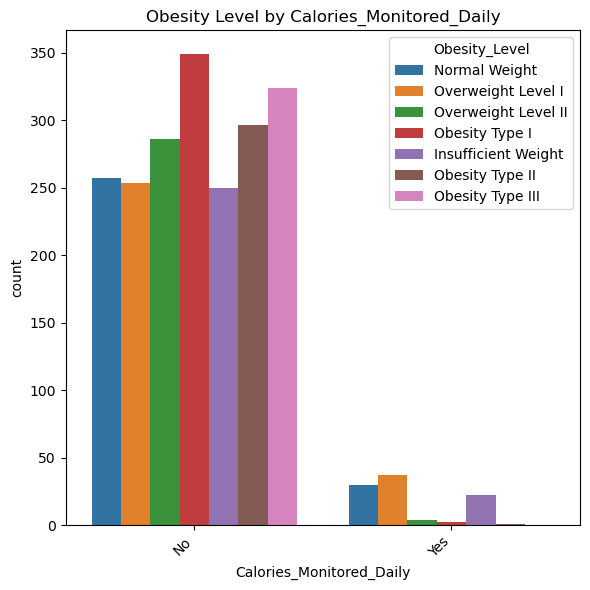

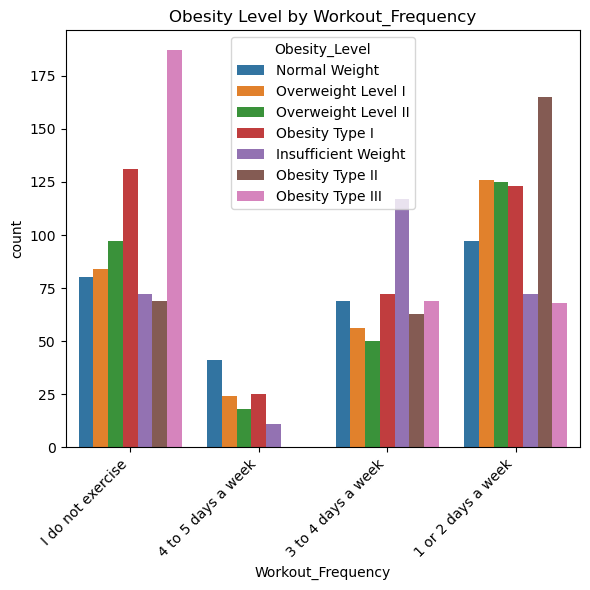

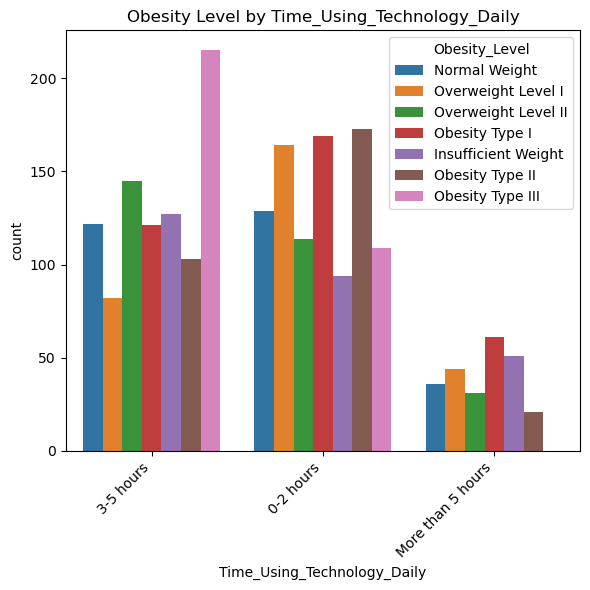

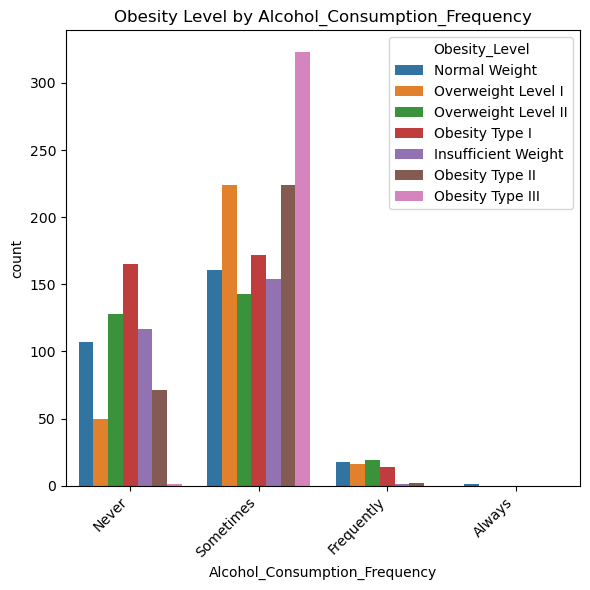

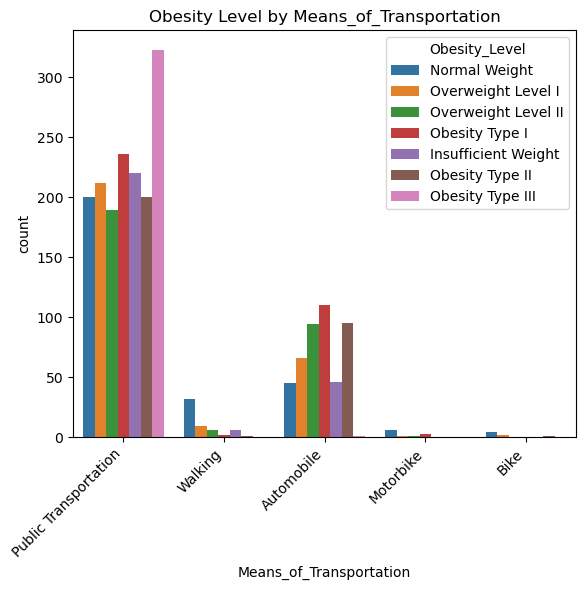

In [585]:
cat2 = categorical.drop('Obesity_Level')
for col in cat2:
    plt.figure(figsize=(6,6))
    sns.countplot(x=col, hue='Obesity_Level', data=df)
    plt.title(f'Obesity Level by {col}')
    plt.xticks(rotation=45, ha='right')
    plt.tight_layout()
    plt.show()

## Model 1: Multiple Regression

Which eating habits, lifestyle factors, and physical activity factors are most predictive of BMI?

In [586]:
df['Alcohol_Consumption_Frequency'].value_counts()

Alcohol_Consumption_Frequency
Sometimes     1401
Never          639
Frequently      70
Always           1
Name: count, dtype: int64

Based on our EDA, there seems to be a major class imbalance between the different levels of our Alcohol_Consumption_Frequency variable, the "Always" category only has 1 observation, so we will just remove it.

In [587]:
df= df[df['Alcohol_Consumption_Frequency'] != 'Always']

In [588]:
target = 'BMI (kg/m2)'
nums = ['Age']
cats = [
    'Overweight_Family_History',
    'High_Calorie_Consumption_Often',
    'Vegetable_Consumption_Often',
    'Calories_Monitored_Daily',
    'Workout_Frequency',
    'Alcohol_Consumption_Frequency',
    'Means_of_Transportation'
]

X = df[nums + cats]
y = df[target]

# train test split 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Reset indices so X and y align
X_train = X_train.reset_index(drop=True)
X_test = X_test.reset_index(drop=True)
y_train = y_train.reset_index(drop=True)
y_test = y_test.reset_index(drop=True)

In [589]:
preprocess = ColumnTransformer(
    transformers=[
        ("encoder", OneHotEncoder(drop="first"), cats),
        ("numeric", "passthrough", nums)
    ]
)

X_train_processed = preprocess.fit_transform(X_train)
X_test_processed = preprocess.transform(X_test)

feature_names = preprocess.get_feature_names_out()
X_train_df = pd.DataFrame(X_train_processed, columns=feature_names)
X_test_df = pd.DataFrame(X_test_processed, columns=feature_names)

X_train_sm = sm.add_constant(X_train_df)
model = sm.OLS(y_train, X_train_sm).fit()

print(model.summary())

                            OLS Regression Results                            
Dep. Variable:            BMI (kg/m2)   R-squared:                       0.439
Model:                            OLS   Adj. R-squared:                  0.434
Method:                 Least Squares   F-statistic:                     87.36
Date:                Mon, 17 Nov 2025   Prob (F-statistic):          2.01e-197
Time:                        21:37:14   Log-Likelihood:                -5411.3
No. Observations:                1688   AIC:                         1.085e+04
Df Residuals:                    1672   BIC:                         1.094e+04
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
                                                             coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------

The p-value of the overall F-test was highly significant, indicating that the regression model explains a significant portion of the variability in BMI.

In [590]:
X_test_sm = sm.add_constant(X_test_df)
y_pred = model.predict(X_test_sm)
r2 = r2_score(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))

print(f"\nR² = {r2:.3f}, RMSE = {rmse:.3f}")


R² = 0.350, RMSE = 6.573


## Check Assumptions (Multiple Regression)

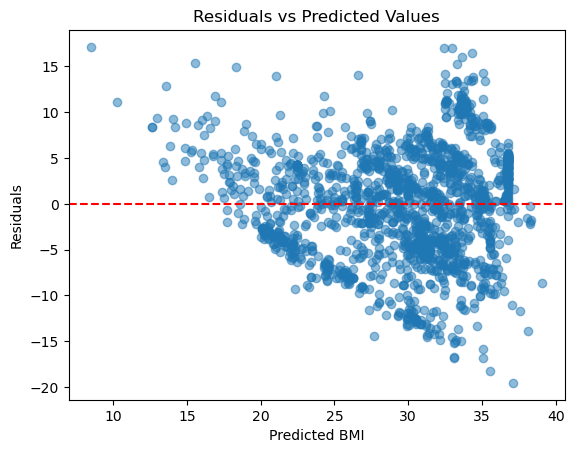

In [591]:
y_pred = model.fittedvalues
residuals = model.resid

# Residuals vs predicted
plt.scatter(y_pred, residuals, alpha=0.5)
plt.axhline(0, color='red', linestyle='--')
plt.xlabel("Predicted BMI")
plt.ylabel("Residuals")
plt.title("Residuals vs Predicted Values")
plt.show()

1. Linearity: The residuals are not randomly scattered around 0, as there is a clear pattern, indicating that the linearity assumption has been violated. 

2. Independence: Because the Durbin–Watson statistic was 2.111, very close to 2, the independence assumption is satisfied.

3. Constant variance of errors: There is a clear pattern when the residuals are plotted, so this assumption is violated. I will try transforming the response variable.

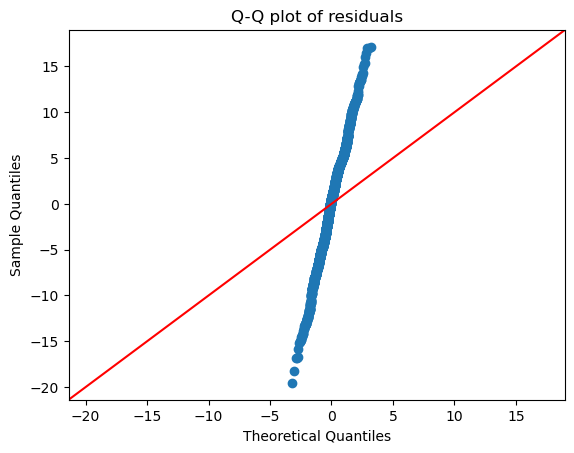

In [592]:
sm.qqplot(residuals, line='45')
plt.title("Q-Q plot of residuals")
plt.show()

Text(0, 0.5, 'Frequency')

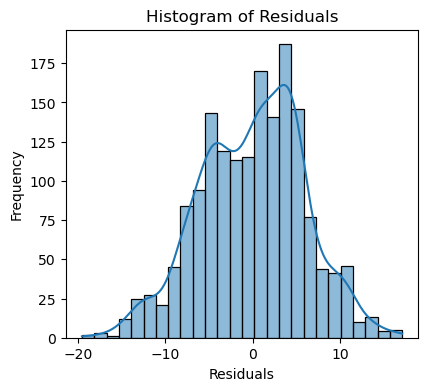

In [593]:
plt.figure(figsize=(10, 4))

plt.subplot(1, 2, 1)
sns.histplot(residuals, kde=True)
plt.title("Histogram of Residuals")
plt.xlabel("Residuals")
plt.ylabel("Frequency")

4. Normality assumption: the qqplot of the residuals were a straight line, but deviated from the red theoretical normal line, so I created a histogram of the residuals to further check the normality assumption. The histogram appears to be roughly symmetric and bell shaped around 0, so the normality assumption is met. 

In [594]:
X_df = pd.DataFrame(model.model.exog, columns=model.model.exog_names)

vif = pd.DataFrame()
vif['Variable'] = X_df.columns
vif['VIF'] = [variance_inflation_factor(X_df.values, i) for i in range(X_df.shape[1])]
print(vif)

                                             Variable        VIF
0                                               const  93.527943
1              encoder__Overweight_Family_History_Yes   1.131661
2         encoder__High_Calorie_Consumption_Often_Yes   1.150136
3          encoder__Vegetable_Consumption_Often_Never   1.066867
4      encoder__Vegetable_Consumption_Often_Sometimes   1.083732
5               encoder__Calories_Monitored_Daily_Yes   1.097210
6       encoder__Workout_Frequency_3 to 4 days a week   1.306901
7       encoder__Workout_Frequency_4 to 5 days a week   1.148012
8        encoder__Workout_Frequency_I do not exercise   1.297023
9        encoder__Alcohol_Consumption_Frequency_Never   7.513456
10   encoder__Alcohol_Consumption_Frequency_Sometimes   7.632458
11              encoder__Means_of_Transportation_Bike   1.030973
12         encoder__Means_of_Transportation_Motorbike   1.028615
13  encoder__Means_of_Transportation_Public Transp...   1.838528
14           encoder__Mea

Most variables have VIFs under 2, indicating little concern for multicollinearity. The alcohol consumption dummy variables have VIFs around 7.5, which suggests some multicollinearity may be present. However, since these values are below the commonly used threshold of 10, I will leave the model unchanged.

In order to address the linearity and constant variance of errors assumptions that have been violated, we will try a few different transformations on the response. 

# Log transform the response

In [595]:
y_train_log = np.log(y_train)
y_test_log = np.log(y_test)
X_train_sm= sm.add_constant(X_train_df)

# Fit model on log(y)
model_log = sm.OLS(y_train_log, X_train_sm).fit()

print(model_log.summary())

                            OLS Regression Results                            
Dep. Variable:            BMI (kg/m2)   R-squared:                       0.446
Model:                            OLS   Adj. R-squared:                  0.441
Method:                 Least Squares   F-statistic:                     89.67
Date:                Mon, 17 Nov 2025   Prob (F-statistic):          1.41e-201
Time:                        21:37:14   Log-Likelihood:                 244.90
No. Observations:                1688   AIC:                            -457.8
Df Residuals:                    1672   BIC:                            -370.9
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
                                                             coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------

In [596]:
from sklearn.metrics import r2_score, mean_squared_error

X_test_sm = sm.add_constant(X_test_df)  # add constant to test predictors
y_pred_log = model_log.predict(X_test_sm)

#eval on log scale
r2_log = r2_score(y_test_log, y_pred_log)
rmse_log = np.sqrt(mean_squared_error(y_test_log, y_pred_log))
print(f"R² (log scale) = {r2_log:.3f}, RMSE (log scale) = {rmse_log:.3f}")

#og scale
y_pred = np.exp(y_pred_log)
r2_orig = r2_score(y_test, y_pred)
rmse_orig = np.sqrt(mean_squared_error(y_test, y_pred))
print(f"R² (original BMI scale) = {r2_orig:.3f}, RMSE = {rmse_orig:.3f}")

R² (log scale) = 0.334, RMSE (log scale) = 0.233
R² (original BMI scale) = 0.342, RMSE = 6.611


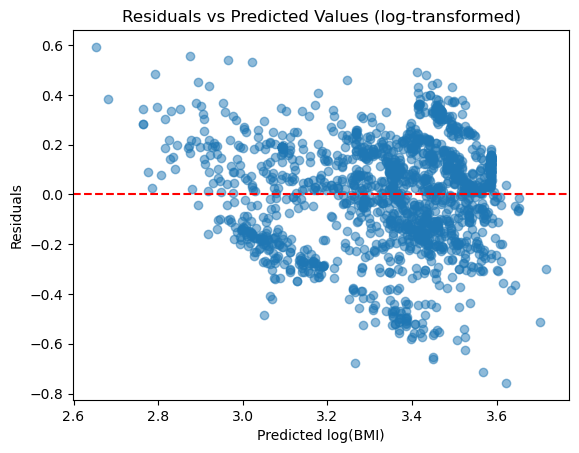

In [597]:
y_pred_log = model_log.fittedvalues     
residuals_log = model_log.resid  
plt.scatter(y_pred_log, residuals_log, alpha=0.5)
plt.axhline(0, color='red', linestyle='--')
plt.xlabel("Predicted log(BMI)")
plt.ylabel("Residuals")
plt.title("Residuals vs Predicted Values (log-transformed)")
plt.show()

## Square Root Transformation

In [598]:
y_train_sqrt = np.sqrt(y_train)
y_test_sqrt = np.sqrt(y_test)

X_train_sm = sm.add_constant(X_train_df)
model_sqrt = sm.OLS(y_train_sqrt, X_train_sm).fit()

print(model_sqrt.summary())

                            OLS Regression Results                            
Dep. Variable:            BMI (kg/m2)   R-squared:                       0.444
Model:                            OLS   Adj. R-squared:                  0.439
Method:                 Least Squares   F-statistic:                     88.99
Date:                Mon, 17 Nov 2025   Prob (F-statistic):          2.38e-200
Time:                        21:37:14   Log-Likelihood:                -1394.5
No. Observations:                1688   AIC:                             2821.
Df Residuals:                    1672   BIC:                             2908.
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
                                                             coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------

In [599]:
X_test_sm = sm.add_constant(X_test_df)
y_pred_sqrt = model_sqrt.predict(X_test_sm)

from sklearn.metrics import r2_score, mean_squared_error
import numpy as np

#sqrt scale
r2_sqrt = r2_score(y_test_sqrt, y_pred_sqrt)
rmse_sqrt = np.sqrt(mean_squared_error(y_test_sqrt, y_pred_sqrt))
print(f"R² (sqrt scale) = {r2_sqrt:.3f}, RMSE (sqrt scale) = {rmse_sqrt:.3f}")

#og
y_pred = y_pred_sqrt**2  # back-transform
r2_orig = r2_score(y_test, y_pred)
rmse_orig = np.sqrt(mean_squared_error(y_test, y_pred))
print(f"R² (original BMI scale) = {r2_orig:.3f}, RMSE = {rmse_orig:.3f}")


R² (sqrt scale) = 0.342, RMSE (sqrt scale) = 0.613
R² (original BMI scale) = 0.354, RMSE = 6.550


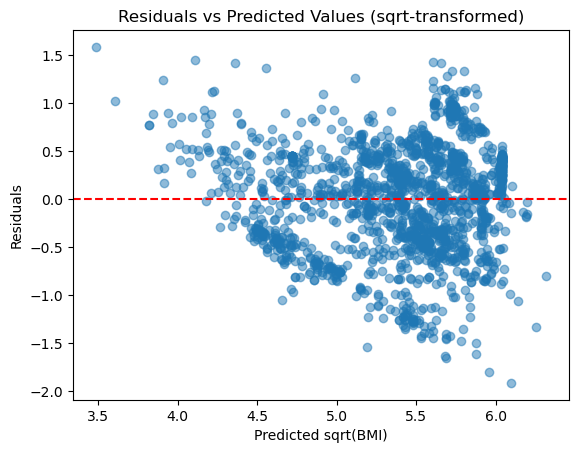

In [600]:
residuals_sqrt = y_train_sqrt - model_sqrt.fittedvalues

# Residuals vs fitted
import matplotlib.pyplot as plt
plt.scatter(model_sqrt.fittedvalues, residuals_sqrt, alpha=0.5)
plt.axhline(0, color='red', linestyle='--')
plt.xlabel("Predicted sqrt(BMI)")
plt.ylabel("Residuals")
plt.title("Residuals vs Predicted Values (sqrt-transformed)")
plt.show()

Neither transformation improved the residuals, and diagnostic plots indicated that the linearity assumption and constant variance of errors were not met, so a linear model is probably not the best fit. Polynomial or spline models are unlikely to help much, since most predictors are categorical. Next, we will fit a Lasso regression on the same features after standardization to improve prediction and perform feature selection.

In [601]:
lasso_pipeline = Pipeline([
    ('preprocessor', preprocess),       
    ('scaler', StandardScaler()),       
    ('lasso', LassoCV(cv=5, random_state=42))  
])

lasso_pipeline.fit(X_train, y_train)

y_pred_lasso = lasso_pipeline.predict(X_test)

r2_lasso = r2_score(y_test, y_pred_lasso)
rmse_lasso = np.sqrt(mean_squared_error(y_test, y_pred_lasso))
print(f"Lasso R² = {r2_lasso:.3f}, RMSE = {rmse_lasso:.3f}")

feature_names = preprocess.get_feature_names_out()
lasso_coefs = pd.Series(lasso_pipeline.named_steps['lasso'].coef_, index=feature_names)
print("\nLasso coefficients (non-zero only):")
print(lasso_coefs[lasso_coefs != 0].sort_values(ascending=False))

Lasso R² = 0.353, RMSE = 6.556

Lasso coefficients (non-zero only):
encoder__Overweight_Family_History_Yes                    3.278796
numeric__Age                                              2.287889
encoder__Means_of_Transportation_Public Transportation    1.846173
encoder__Alcohol_Consumption_Frequency_Sometimes          1.436045
encoder__High_Calorie_Consumption_Often_Yes               0.704668
encoder__Workout_Frequency_I do not exercise              0.261689
encoder__Means_of_Transportation_Walking                  0.123020
encoder__Means_of_Transportation_Motorbike                0.007329
encoder__Workout_Frequency_3 to 4 days a week            -0.240062
encoder__Workout_Frequency_4 to 5 days a week            -0.324770
encoder__Calories_Monitored_Daily_Yes                    -0.420618
encoder__Vegetable_Consumption_Often_Never               -0.701483
encoder__Vegetable_Consumption_Often_Sometimes           -1.517636
dtype: float64


About 35% of the variance in BMI is explained by the predictors in our test set. This indicates that the strongest predictors of BMI are Family history, age, public transportation, and sometimes drinking alcohol.

Our residuals from OLS showed non-linear patterns, so we will also try using Random Forest.

## Random Forest

In [602]:
from sklearn.ensemble import RandomForestRegressor

rf = RandomForestRegressor(n_estimators=500, random_state=42)

rf.fit(X_train_df, y_train)

# Predict on test set
y_pred_rf = rf.predict(X_test_df)

# Evaluate performance
r2_rf = r2_score(y_test, y_pred_rf)
rmse_rf = np.sqrt(mean_squared_error(y_test, y_pred_rf))
print(f"Random Forest R² = {r2_rf:.3f}, RMSE = {rmse_rf:.3f}")

# Feature importance
rf_importances = pd.Series(rf.feature_importances_, index=X_train_df.columns).sort_values(ascending=False)
print("\nTop 10 most important features:")
print(rf_importances.head(10))


Random Forest R² = 0.657, RMSE = 4.772

Top 10 most important features:
numeric__Age                                              0.374900
encoder__Overweight_Family_History_Yes                    0.246881
encoder__Vegetable_Consumption_Often_Sometimes            0.084856
encoder__Alcohol_Consumption_Frequency_Sometimes          0.080151
encoder__Means_of_Transportation_Public Transportation    0.058530
encoder__Workout_Frequency_I do not exercise              0.035778
encoder__High_Calorie_Consumption_Often_Yes               0.031167
encoder__Workout_Frequency_3 to 4 days a week             0.027508
encoder__Workout_Frequency_4 to 5 days a week             0.020230
encoder__Vegetable_Consumption_Often_Never                0.018342
dtype: float64


The Random Forest model explained 66% of the variance in BMI (R² = 0.657) and achieved an RMSE of 4.77, indicating substantially better predictive performance than both OLS and Lasso. The most important predictors were age and family history of overweight, followed by lifestyle factors such as vegetable consumption, alcohol intake, exercise frequency, and transportation method. This suggests that Random Forest effectively captures non-linear relationships and interactions that linear models could not.

Across the three models, age and family history consistently emerged as the strongest predictors of BMI. OLS regression provided interpretable coefficients and significance tests, showing that higher age, positive family history, higher alcohol intake, lower vegetable consumption, and certain transportation methods were associated with increased BMI. Lasso regression, a regularized linear model, confirmed these main predictors while shrinking less important variables toward zero, resulting in slightly lower predictive accuracy (R² = 0.353, RMSE = 6.56). Random Forest, by capturing non-linear patterns and interactions, achieved the highest predictive accuracy (R² = 0.657, RMSE = 4.77) and highlighted the same variables as most influential, though with importance scores rather than effect sizes. Overall, the combined analysis indicates that both demographic factors (age, family history) and lifestyle behaviors (diet, alcohol, exercise, transportation) contribute meaningfully to BMI, with predictive performance improving as model flexibility increases.

## Model 2: Multinomial Logistic Regression

Which eating habits, lifestyle factors, and physical activity factors are most predictive of obesity level?

In [603]:
df.head(5)

,Gender,Age,Height (m),Weight (kg),Overweight_Family_History,High_Calorie_Consumption_Often,Vegetable_Consumption_Often,Num_Main_Meals_Daily,Eat_Between_Meals,Smoke_Regularly,Water_Drank_Daily,Calories_Monitored_Daily,Workout_Frequency,Time_Using_Technology_Daily,Alcohol_Consumption_Frequency,Means_of_Transportation,Obesity_Level,BMI (kg/m2)
0,Female,21.0,1.62,64.0,Yes,No,Sometimes,3,Sometimes,No,Between 1 and 2 liters,No,I do not exercise,3-5 hours,Never,Public Transportation,Normal Weight,24.39
1,Female,21.0,1.52,56.0,Yes,No,Always,3,Sometimes,Yes,More than 2 liters,Yes,4 to 5 days a week,0-2 hours,Sometimes,Public Transportation,Normal Weight,24.24
2,Male,23.0,1.80,77.0,Yes,No,Sometimes,3,Sometimes,No,Between 1 and 2 liters,No,3 to 4 days a week,3-5 hours,Frequently,Public Transportation,Normal Weight,23.77
3,Male,27.0,1.80,87.0,No,No,Always,3,Sometimes,No,Between 1 and 2 liters,No,3 to 4 days a week,0-2 hours,Frequently,Walking,Overweight Level I,26.85
4,Male,22.0,1.78,89.8,No,No,Sometimes,1,Sometimes,No,Between 1 and 2 liters,No,I do not exercise,0-2 hours,Sometimes,Public Transportation,Overweight Level II,28.34


In [604]:
df.columns

Index(['Gender', 'Age', 'Height (m)', 'Weight (kg)',
       'Overweight_Family_History', 'High_Calorie_Consumption_Often',
       'Vegetable_Consumption_Often', 'Num_Main_Meals_Daily',
       'Eat_Between_Meals', 'Smoke_Regularly', 'Water_Drank_Daily',
       'Calories_Monitored_Daily', 'Workout_Frequency',
       'Time_Using_Technology_Daily', 'Alcohol_Consumption_Frequency',
       'Means_of_Transportation', 'Obesity_Level', 'BMI (kg/m2)'],
      dtype='object')

In [605]:
df['Obesity_Level'].value_counts()

Obesity_Level
Obesity Type I         351
Obesity Type III       324
Obesity Type II        297
Overweight Level I     290
Overweight Level II    290
Normal Weight          286
Insufficient Weight    272
Name: count, dtype: int64

In [606]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, log_loss, confusion_matrix, classification_report, roc_auc_score
from sklearn.model_selection import train_test_split

Because weight, height, and BMI are all direct components of obesity classificatins, we will remove them from this model so that we can see the true impact of the other variables on obesity classifications.

In [607]:
logit_df = df.drop(columns=['BMI (kg/m2)', 'Height (m)', 'Weight (kg)'])

In [608]:
logit_X = logit_df[['Gender', 'Age','Overweight_Family_History', 'High_Calorie_Consumption_Often',
       'Vegetable_Consumption_Often', 'Num_Main_Meals_Daily',
       'Eat_Between_Meals', 'Smoke_Regularly', 'Water_Drank_Daily',
       'Calories_Monitored_Daily', 'Workout_Frequency',
       'Time_Using_Technology_Daily', 'Alcohol_Consumption_Frequency',
       'Means_of_Transportation']]
logit_y = logit_df['Obesity_Level']

In [609]:
cats = ['Gender', 'Overweight_Family_History', 'High_Calorie_Consumption_Often',
       'Vegetable_Consumption_Often',
       'Eat_Between_Meals', 'Smoke_Regularly', 'Water_Drank_Daily',
       'Calories_Monitored_Daily', 'Workout_Frequency',
       'Time_Using_Technology_Daily', 'Alcohol_Consumption_Frequency',
       'Means_of_Transportation']
nums = ['Age', 'Num_Main_Meals_Daily']

In [610]:
preprocess = ColumnTransformer(transformers=[("encoder", OneHotEncoder(drop="first"), cats),
 ("numeric", StandardScaler(), nums)])

In [611]:
logreg = LogisticRegression(multi_class='multinomial', solver='lbfgs', max_iter=2000)

In [612]:
pipe = Pipeline(steps=[
    ("preprocess", preprocess),
    ("model", logreg)
])

In [613]:
X_train_logit, X_test_logit, y_train_logit, y_test_logit = train_test_split(
logit_X, logit_y, test_size=0.20, stratify=logit_y, random_state=42)

In [614]:
pipe.fit(X_train_logit, y_train_logit)

/Users/erinsiedlecki/miniconda3/envs/ds6001/lib/python3.13/site-packages/sklearn/linear_model/_logistic.py:1272: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


,steps,"[('preprocess', ...), ('model', ...)]"
,transform_input,None
,memory,None
,verbose,False
,transformers,"[('encoder', ...), ('numeric', ...)]"
,remainder,'drop'
,sparse_threshold,0.3
,n_jobs,None
,transformer_weights,None
,verbose,False
,verbose_feature_names_out,True


In [615]:
print('Training Accuracy:', pipe.score(X_train_logit, y_train_logit))
print('Testing Accuracy:', pipe.score(X_test_logit, y_test_logit))

Training Accuracy: 0.6332938388625592
Testing Accuracy: 0.6374407582938388


In [616]:
y_pred_probs = pipe.predict_proba(X_test_logit)
loss = log_loss(y_test_logit, y_pred_probs)
print('Log Loss:', loss)

Log Loss: 1.063015923164218


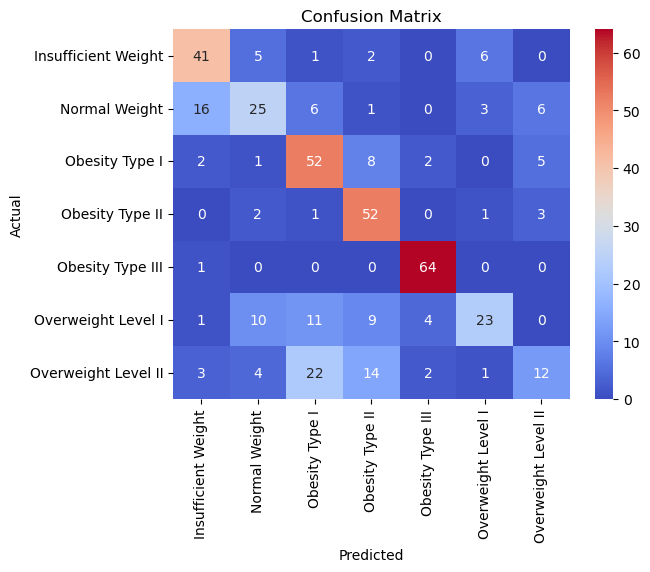

In [617]:
y_pred_logit = pipe.predict(X_test_logit)
conf_mat = confusion_matrix(y_test_logit, y_pred_logit, labels=pipe.classes_)
sns.heatmap(conf_mat, annot=True, cmap='coolwarm', fmt='d', xticklabels=pipe.classes_, yticklabels=pipe.classes_)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

In [618]:
print(classification_report(y_test_logit, y_pred_logit))

                     precision    recall  f1-score   support

Insufficient Weight       0.64      0.75      0.69        55
      Normal Weight       0.53      0.44      0.48        57
     Obesity Type I       0.56      0.74      0.64        70
    Obesity Type II       0.60      0.88      0.72        59
   Obesity Type III       0.89      0.98      0.93        65
 Overweight Level I       0.68      0.40      0.50        58
Overweight Level II       0.46      0.21      0.29        58

           accuracy                           0.64       422
          macro avg       0.62      0.63      0.61       422
       weighted avg       0.63      0.64      0.61       422



In [619]:
roc_auc_score(y_test_logit, y_pred_probs, multi_class='ovr')

0.8878254824002871

In [620]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import label_binarize

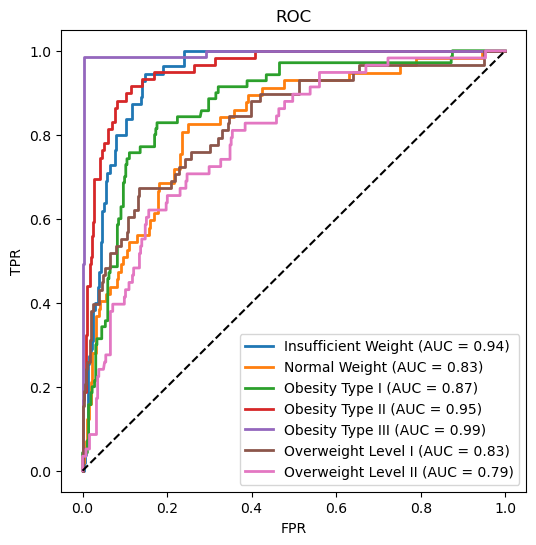

In [621]:
y_test_bin = label_binarize(y_test_logit, classes=np.unique(y_test_logit))
n = y_test_bin.shape[1]
y_pred_probs = pipe.predict_proba(X_test_logit)

plt.figure(figsize=(6,6))
for i in range(n):
    fpr, tpr, _ = roc_curve(y_test_bin[:, i], y_pred_probs[:, i])
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, lw=2, label=f'{np.unique(y_test_logit)[i]} (AUC = {roc_auc:.2f})')

plt.plot([0,1], [0,1], color='black', linestyle='--')
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.title('ROC')
plt.legend(loc="lower right")
plt.show()

## Cross Validation

In [622]:
from sklearn.model_selection import cross_val_score

cv = cross_val_score(pipe, X_train_logit, y_train_logit, cv=5, scoring='accuracy')
print(f"CV Accuracy Scores: {cv}")
print(f"Mean CV Accuracy: {cv.mean():.3f}")
print(f"Standard Deviation of CV Accuracy: {cv.std():.3f}")

CV Accuracy Scores: [0.5887574  0.6183432  0.59467456 0.61721068 0.61424332]
Mean CV Accuracy: 0.607
Standard Deviation of CV Accuracy: 0.012


/Users/erinsiedlecki/miniconda3/envs/ds6001/lib/python3.13/site-packages/sklearn/linear_model/_logistic.py:1272: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
/Users/erinsiedlecki/miniconda3/envs/ds6001/lib/python3.13/site-packages/sklearn/linear_model/_logistic.py:1272: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
/Users/erinsiedlecki/miniconda3/envs/ds6001/lib/python3.13/site-packages/sklearn/linear_model/_logistic.py:1272: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
/Users/erinsiedlecki/miniconda3/envs/ds6001/li

In [623]:
from sklearn.model_selection import StratifiedKFold, cross_validate
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
scoring = {"acc": "accuracy", "neg_log_loss": "neg_log_loss"}
cv_results = cross_validate(pipe, logit_X, logit_y, cv=cv, scoring=scoring)
cv_acc = np.mean(cv_results["test_acc"])
cv_ll = -np.mean(cv_results["test_neg_log_loss"])
print(f"Mean CV Accuracy: {cv_acc:.3f}")
print(f"Mean CV Log Loss: {cv_ll:.3f}")

/Users/erinsiedlecki/miniconda3/envs/ds6001/lib/python3.13/site-packages/sklearn/linear_model/_logistic.py:1272: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


Mean CV Accuracy: 0.607
Mean CV Log Loss: 1.053


/Users/erinsiedlecki/miniconda3/envs/ds6001/lib/python3.13/site-packages/sklearn/linear_model/_logistic.py:1272: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
/Users/erinsiedlecki/miniconda3/envs/ds6001/lib/python3.13/site-packages/sklearn/linear_model/_logistic.py:1272: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
/Users/erinsiedlecki/miniconda3/envs/ds6001/lib/python3.13/site-packages/sklearn/linear_model/_logistic.py:1272: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
/Users/erinsiedlecki/miniconda3/envs/ds6001/li

## Lasso

In [624]:
from sklearn.linear_model import LogisticRegressionCV
import plotly.express as px

In [627]:
lasso_clf = Pipeline(steps=[("preprocess", preprocess),
                            ("model", LogisticRegressionCV(penalty="l1", solver="saga", Cs=25, cv=5, 
                                  scoring="neg_log_loss", max_iter=8000, n_jobs=-1, multi_class='ovr'))])
lasso_clf.fit(X_train_logit, y_train_logit)
categoricals = cats
numerics = nums
encoder_names = lasso_clf.named_steps["preprocess"].named_transformers_["encoder"]
catnames = encoder_names.get_feature_names_out(categoricals)
features = np.concatenate((catnames, numerics))
lasso_model = lasso_clf.named_steps["model"]
coefs = lasso_model.coef_
coef_df = pd.DataFrame(coefs.T, index=features, columns=lasso_model.classes_)
cdf_melt = coef_df.reset_index().melt(id_vars="index", var_name="Class", value_name="Coefficient")
cdf_sort = cdf_melt.sort_values("Coefficient", ascending=False)
fig = px.bar(cdf_sort, x="Coefficient", y="index", color="Class", orientation="h", title="Lasso Coefficients by Magnitude")
fig.update_layout(yaxis={"categoryorder":"total ascending"})
fig.show()

/Users/erinsiedlecki/miniconda3/envs/ds6001/lib/python3.13/site-packages/sklearn/linear_model/_logistic.py:1955: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. Use OneVsRestClassifier(LogisticRegressionCV(..)) instead. Leave it to its default value to avoid this warning.
  warnings.warn(


In [630]:
top5 = 5
abs_coef = coef_df.abs()
top5_feat = {}

for cols in coef_df.columns:
    top5_feat[cols] = abs_coef[cols].sort_values(ascending=False).head(top5).index.tolist()

top5_feat_df = pd.DataFrame(top5_feat)
top5_feat_df

,Insufficient Weight,Normal Weight,Obesity Type I,Obesity Type II,Obesity Type III,Overweight Level I,Overweight Level II
0,Eat_Between_Meals_Frequently,Eat_Between_Meals_Sometimes,Overweight_Family_History_Yes,Gender_Male,Gender_Male,Eat_Between_Meals_Never,High_Calorie_Consumption_Often_Yes
1,Means_of_Transportation_Motorbike,Means_of_Transportation_Walking,High_Calorie_Consumption_Often_Yes,Overweight_Family_History_Yes,Vegetable_Consumption_Often_Sometimes,Calories_Monitored_Daily_Yes,Overweight_Family_History_Yes
2,Alcohol_Consumption_Frequency_Never,Means_of_Transportation_Bike,Calories_Monitored_Daily_Yes,Workout_Frequency_4 to 5 days a week,Overweight_Family_History_Yes,Eat_Between_Meals_Frequently,Smoke_Regularly_Yes
3,Means_of_Transportation_Walking,Means_of_Transportation_Motorbike,Vegetable_Consumption_Often_Sometimes,Eat_Between_Meals_Frequently,Means_of_Transportation_Public Transportation,Alcohol_Consumption_Frequency_Never,Eat_Between_Meals_Sometimes
4,Age,Smoke_Regularly_Yes,Eat_Between_Meals_Frequently,Eat_Between_Meals_Sometimes,Eat_Between_Meals_Sometimes,Vegetable_Consumption_Often_Sometimes,Time_Using_Technology_Daily_3-5 hours
